In [52]:
import math
import numpy
from matplotlib import pyplot 
%matplotlib inline

In [53]:
#establish grid 
N = 51 
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [54]:
#load data files
airfoil_x = numpy.loadtxt('NACA0012_x.txt')
airfoil_y = numpy.loadtxt('NACA0012_y.txt')
sigma = numpy.loadtxt('NACA0012_sigma.txt')

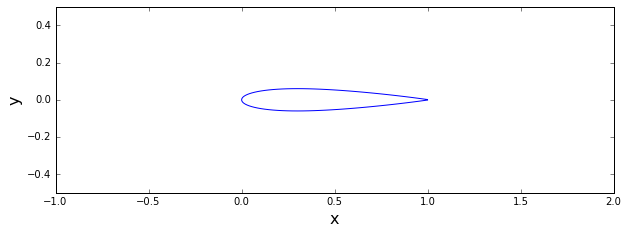

In [132]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(airfoil_x, airfoil_y)

In [133]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink
    strength: strength of the source/sink
    xs: x-coordinate of source/sink
    ys: y-coordinate of source/sink
    
    X: x-coordinate of the mesh points
    Y: y-coordinate of the mesh points
    
    u: x-component of the velocity vector field 
    v: y-component of the velocity vector field 
    """
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    return u,v

In [134]:
#velocities for sources
u_airfoil = numpy.zeros((N,N))
v_airfoil = numpy.zeros((N,N))

for i in range(0, len(sigma)):
    u, v = get_velocity(sigma[i], airfoil_x[i], airfoil_y[i], X, Y)
    u_airfoil += u
    v_airfoil += v

In [135]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function generated by a source 
    strength: strength of the source/sink
    xs: x-coordinate of source/sink
    ys: y-coordinate of source/sink
    
    X: x-coordinate of the mesh points
    Y: y-coordinate of the mesh points
    
    psi: stream function, 2D numpy array
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

In [136]:
#stream function for sources

psi_airfoil = numpy.zeros((N,N))
for i in range(0, len(sigma)):
    psi = get_stream_function(sigma[i], airfoil_x[i], airfoil_y[i], X, Y)
    psi_airfoil += psi

In [137]:
#freestream information
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y


In [138]:
#superposition

u = u_airfoil + u_freestream
v = v_airfoil + v_freestream
psi = psi_airfoil + psi_freestream

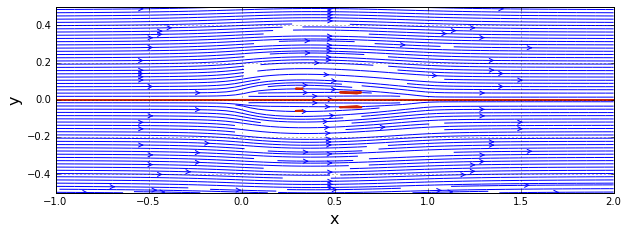

In [139]:
#plotting streamlines

size = 10
pyplot.figure(figsize=(size, (y_end - y_start)/(x_end - x_start) * size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');


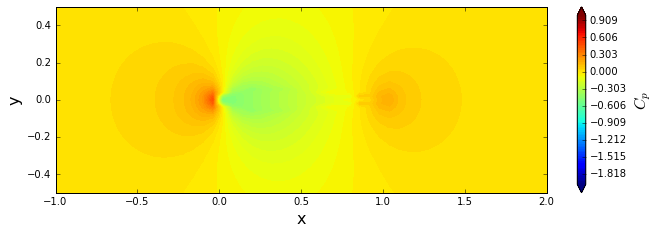

In [127]:
#calculate pressure coefficient, Cp

cp = 1.0 - (u**2+v**2)/u_inf**2
#x_stagnation, y_stagnation = 

#pressure coefficient field 
size = 10
pyplot.figure(figsize=(1.1*size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
#pyplot.scatter(x_stagnation, y_stagnation, color='#CD2305')
cbar.set_label('$C_p$', fontsize = 16)

In [149]:
#maximum pressure coefficient and array indices

maxCp = numpy.max(cp)
loc_maxCp = numpy.argmax(cp)
print(maxCp)
print(loc_maxCp)
maxCp_indices = numpy.unravel_index(loc_maxCp, cp.shape)
print(maxCp_indices)

0.471443661332
1291
(25, 16)


In [150]:
#stagnation points - u,v = 0? could also be where cp is minimized? 

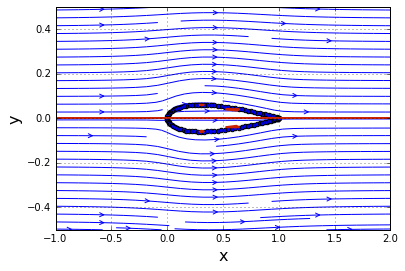

In [147]:
#streamlines and profile of NACA0012 airfoil 
pyplot.grid(True)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');
pyplot.scatter(airfoil_x, airfoil_y)

# Questions 

Do the stream lines look like you expected? 
Ans: Yes

What does the distribution of pressure tell you about lift generated by the airfoil? Ans: The pressure distribution shows that there is no lift 

Does the location of the point of maximum pressure seem right to you? Yes